### Logistic Regression from scratch- For Binary Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.metrics import accuracy_score



### Training data and training label

#### Creating dataset- 

In [2]:
c1 = [2,3]# Cluster center for class 1 data
c2 = [10,11]# Cluster center for class 2 data
no = 50 # No of samples in a class
'''
numpy.matlib.repmat(a, m, n):Repeat 'a' 0-D to 2-D array or matrix MxN times.
numpy.random.randn(d0, d1, ..., dn):Return a sample (or samples) from the “standard normal” distribution.
numpy.append(arr, values, axis=None):Append values to the end of an array.
numpy.concatenate((a1, a2, ...), axis=0, out=None) : Join a sequence of arrays along an existing axis.



'''
class1 = np.matlib.repmat(c1,no,1) + np.random.randn(no,len(c1))
class2 = np.matlib.repmat(c2, no,1)+ np.random.randn(no,len(c2))
D = np.append(class1,class2,axis =0)
print(type(D))
print(D.shape)
Data = np.concatenate((D, np.ones((2*no,1))),axis = 1)
print(type(Data))
print(Data.shape)
c1_label = np.ones((no,1))
print(c1_label)
print(c1_label.shape)
c2_label = -1*np.ones((no,1))
print(c2_label)
print(c2_label.shape)

label = np.concatenate((c1_label,c2_label),axis = 0)
Data = Data.T #traspose ->now(3,100)
y = label.T# True label
print(label)
print(label.shape)
print(y)
print(y.shape)
print(Data.shape)

<class 'numpy.ndarray'>
(100, 2)
<class 'numpy.ndarray'>
(100, 3)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(50, 1)
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
(50, 1)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]


#### Plotting data

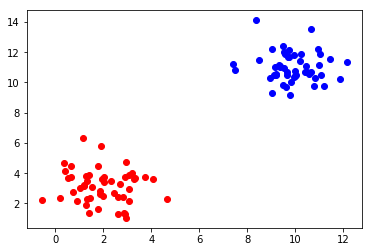

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1[:,0],class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

### Validation data

In [4]:
v1 = [5,4]# Cluster center for class1 data of validation data set
v2 = [7,12]# Cluster center for class 2 data of validation data set
v_no = 30# No of samples in a class
v_class1 = np.matlib.repmat(v1,v_no,1) + np.random.randn(v_no,len(v1))
v_class2 = np.matlib.repmat(v2, v_no,1)+ np.random.randn(v_no,len(v2))
v_D = np.append(v_class1,v_class2,axis =0)
v_Data = np.concatenate((v_D, np.ones((2*v_no,1))),axis = 1)
v_c1_label = np.ones((v_no,1))
v_c2_label = -1*np.ones((v_no,1))
v_label = np.concatenate((v_c1_label,v_c2_label),axis = 0)
v_Data = v_Data.T
v_y = v_label.T# Test label

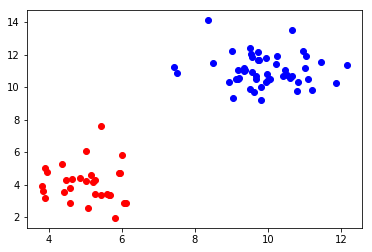

In [5]:
import matplotlib.pyplot as plt
plt.plot(v_class1[:,0],v_class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

#### The activation function used is sigmoid
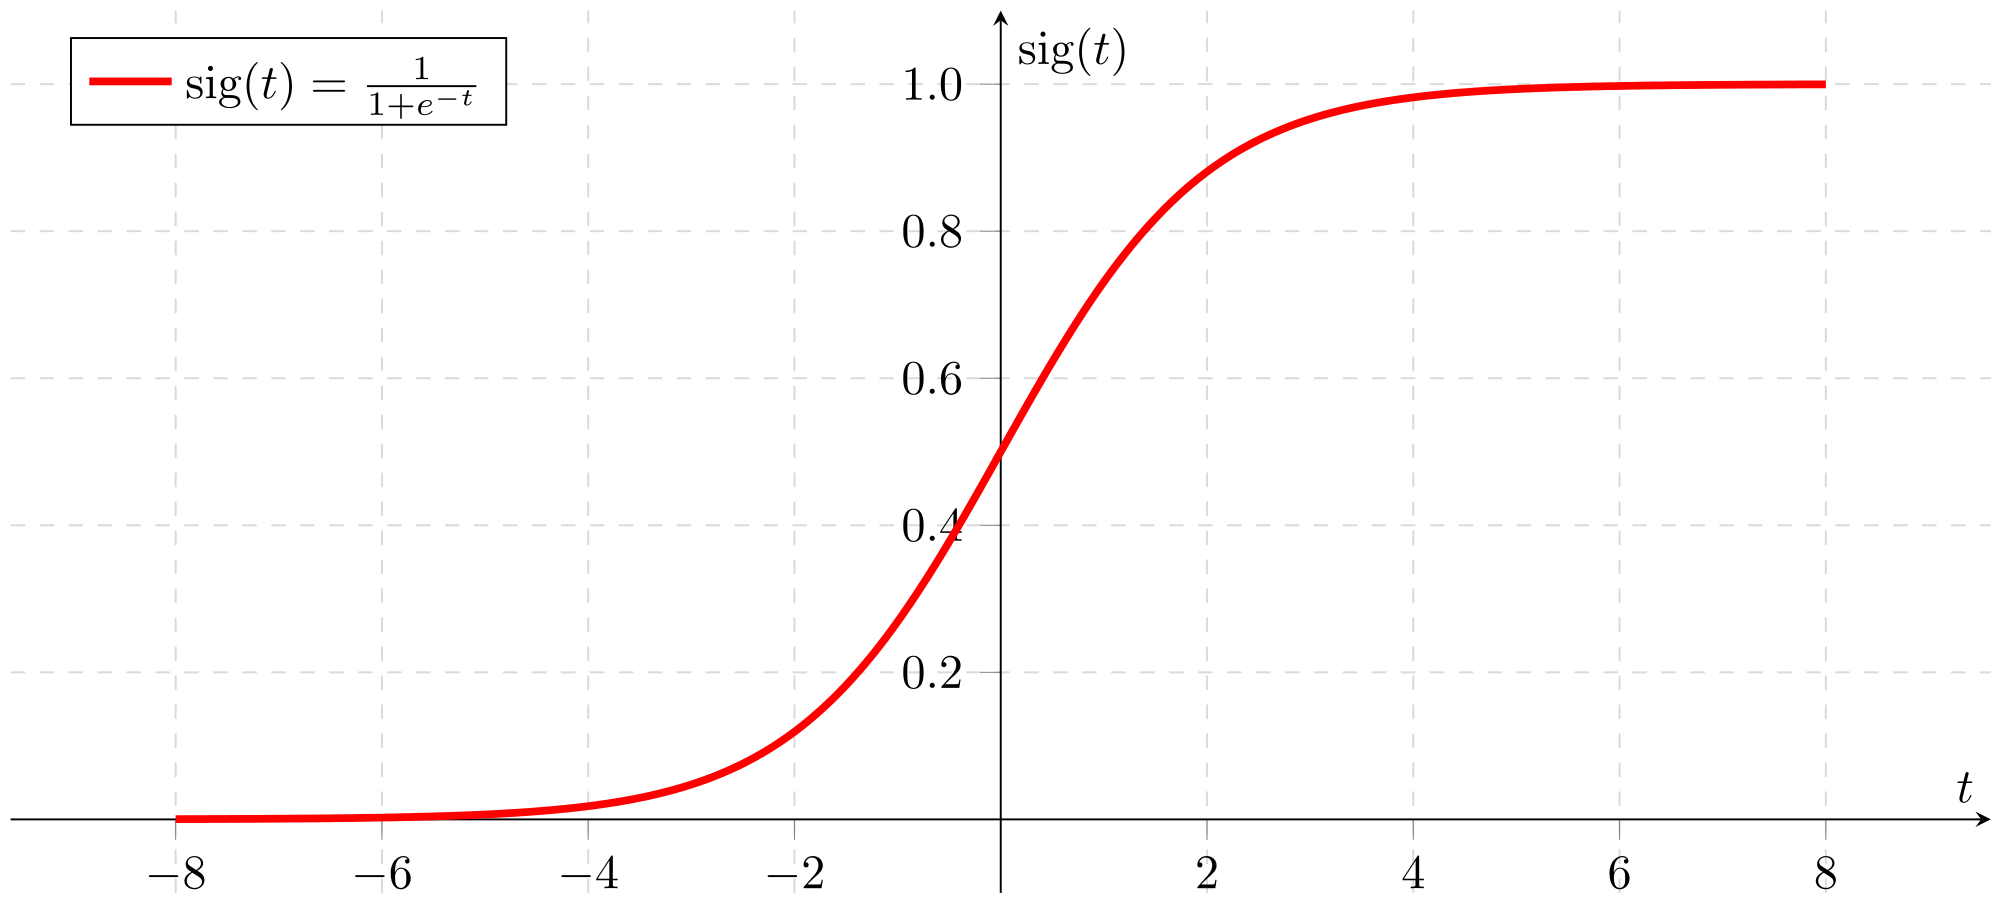

In [9]:
def sigmoid(x):
    a  = 1/(1+np.exp(-x))
    return a

In [10]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred

### Training part- In this step the loss is calculated and minimized with respect to weights. 
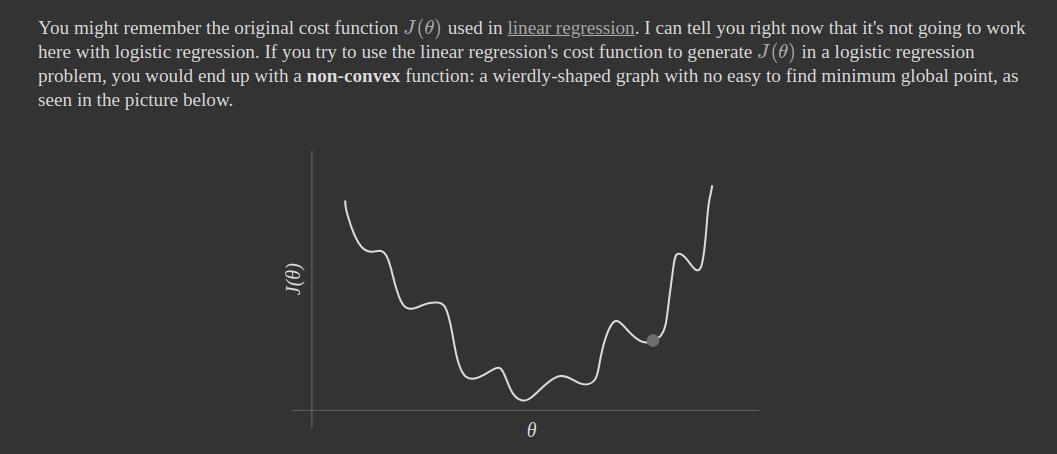

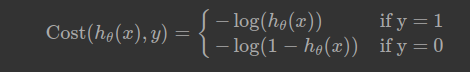

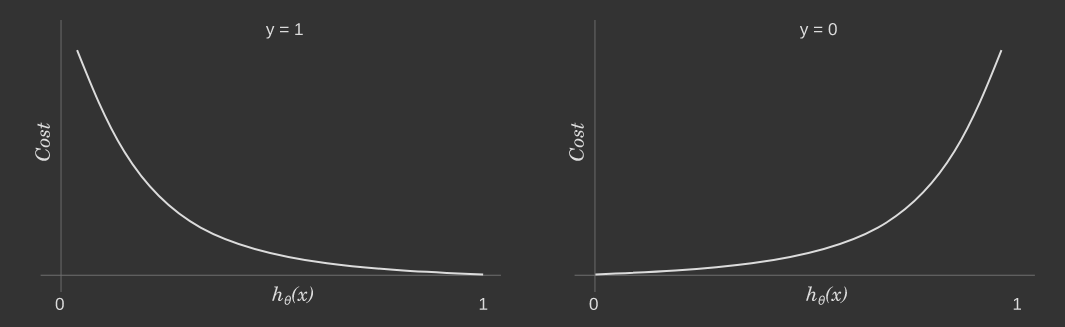

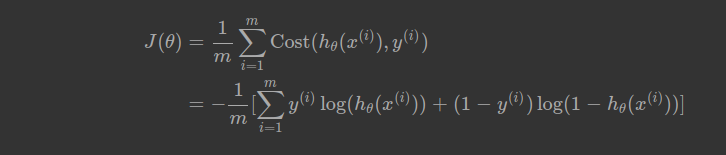

In [11]:
learning_rate = 0.01
w = np.random.randn(1,3)
print(w)
print(w.shape)
for i in range(1,200):
    
    z = np.dot(w,Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(y,z)#element wise multiplication
    #print(val.shape)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(Data,f.T)
    w = w - learning_rate*gradJ.T

    print("Epoch",i,"Loss",J,"Training Accuracy",accuracy_score(y[0], y_pred)*100)


[[ 0.53165411  1.41036821 -0.17528228]]
(1, 3)
Epoch 1 Loss 1032.5072836760353 Training Accuracy 50.0
Epoch 2 Loss 1104.657197242736 Training Accuracy 50.0
Epoch 3 Loss 739.0245077011149 Training Accuracy 50.0
Epoch 4 Loss 374.14578299586344 Training Accuracy 50.0
Epoch 5 Loss 56.24946232007322 Training Accuracy 74.0
Epoch 6 Loss 392.16115908651915 Training Accuracy 50.0
Epoch 7 Loss 1164.6531510880316 Training Accuracy 50.0
Epoch 8 Loss 799.1424008932299 Training Accuracy 50.0
Epoch 9 Loss 435.88031788403055 Training Accuracy 51.0
Epoch 10 Loss 114.13262513427102 Training Accuracy 67.0
Epoch 11 Loss 73.99025120942699 Training Accuracy 69.0
Epoch 12 Loss 466.4845415918013 Training Accuracy 51.0
Epoch 13 Loss 138.73451390560845 Training Accuracy 65.0
Epoch 14 Loss 30.639187156711778 Training Accuracy 88.0
Epoch 15 Loss 52.701349383812534 Training Accuracy 80.0
Epoch 16 Loss 63.07569386950354 Training Accuracy 73.0
Epoch 17 Loss 414.25437543884124 Training Accuracy 51.0
Epoch 18 Loss 104

Epoch 162 Loss 1.6180339087420974 Training Accuracy 100.0
Epoch 163 Loss 1.6112022171685139 Training Accuracy 100.0
Epoch 164 Loss 1.6044303389190324 Training Accuracy 100.0
Epoch 165 Loss 1.5977174447860831 Training Accuracy 100.0
Epoch 166 Loss 1.591062722649128 Training Accuracy 100.0
Epoch 167 Loss 1.5844653769610504 Training Accuracy 100.0
Epoch 168 Loss 1.577924628255829 Training Accuracy 100.0
Epoch 169 Loss 1.5714397126763617 Training Accuracy 100.0
Epoch 170 Loss 1.565009881521435 Training Accuracy 100.0
Epoch 171 Loss 1.5586344008108375 Training Accuracy 100.0
Epoch 172 Loss 1.5523125508677027 Training Accuracy 100.0
Epoch 173 Loss 1.5460436259172248 Training Accuracy 100.0
Epoch 174 Loss 1.5398269337009287 Training Accuracy 100.0
Epoch 175 Loss 1.5336617951057183 Training Accuracy 100.0
Epoch 176 Loss 1.5275475438070008 Training Accuracy 100.0
Epoch 177 Loss 1.5214835259251869 Training Accuracy 100.0
Epoch 178 Loss 1.515469099694938 Training Accuracy 100.0
Epoch 179 Loss 1.5

## Prediction for test data

In [12]:
Test_predict = prediction(w, v_Data)
print("Test Accuracy",accuracy_score(v_y[0], Test_predict)*100)

Test Accuracy 96.66666666666667


## Classifier

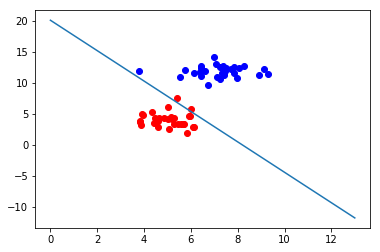

In [13]:
domain =  np.linspace(0,13,100)
h_x = -(w[0,0]/w[0,1])*domain - (w[0,2]/w[0,1])

plt.plot(v_class1[:,0],v_class1[:,1],'ro',v_class2[:,0],v_class2[:,1],'bo')
plt.plot(domain,h_x)
plt.show()

In [ ]:
#explore other data models for multiclass classification
# kNN MUST!